## Experimento para ver el efecto de una capa POOL 

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras


## Dataset: Fashion Mnist

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset que consiste de 60,000 imágenes de entrenamiento en blanco y negro catalogadas en 10 categorías y un test set de 10,000 imágenes. Los labels/rótulos son:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover 
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

### Para importar
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Retorna:
2 tuplas:
1. x_train, x_test: array de uint8 de imágenes blanco y negro de dimensiones (num_samples, 28, 28)
2. y_train, y_test: array de uint8 d rótulos (enteros en el rango range 0-9) con dimensiones (num_samples,).

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Redimensionamos los datos

In [ ]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

### Normalización

In [ ]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

### Dividimos los datos en datasets de entrenamiento/validación/test

In [ ]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

### Arquitectura con Pooling vs sin Pooling

![image.png](attachment:image.png)

### Pooling vs No Pooling

In [ ]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))

# Agrego dos capa convolucionales + avg pooling 
model_a.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding='same', activation='relu'))
model_a.add(keras.layers.AveragePooling2D((2, 2)))

model_a.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding='same', activation='relu'))
model_a.add(keras.layers.AveragePooling2D((2, 2)))

model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

# el segundo modelo no tiene Max Pool, notar que strides = 2 en la capa convolucional para que los dos modelos tengan
# la misma cantidad de parámetros
model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=2, padding='valid', activation='relu', input_shape=(28, 28, 1)))

# Capas convolucionales extra con strides de 2 para equiparar los tamanios de las activaciones
model_b.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=2, padding='valid', activation='relu'))
model_b.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=2, padding='same', activation='relu'))


model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))


Comprobamos que ambos modelos tienen la misma cantidad de parametros

In [ ]:
model_a.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
average_pooling2d_25 (Averag (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 6, 6, 64)          36928     
_________________________________________________________________
average_pooling2d_26 (Averag (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_36 (Flatten)         (None, 576)             

In [ ]:
model_b.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_39 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_117 (Dense)            (None, 300)               173100    
_________________________________________________________________
dense_118 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_119 (Dense)            (None, 10)              

In [ ]:
model_a.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Entrenamos ambos modelos

In [ ]:
model_history_a = model_a.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 69s 80ms/step - loss: 1.4105 - accuracy: 0.5405 - val_loss: 1.0305 - val_accuracy: 0.5902
Epoch 2/3
860/860 [==============================] - 69s 80ms/step - loss: 0.7828 - accuracy: 0.7011 - val_loss: 0.7325 - val_accuracy: 0.7202
Epoch 3/3
860/860 [==============================] - 69s 80ms/step - loss: 0.7017 - accuracy: 0.7325 - val_loss: 0.6986 - val_accuracy: 0.7298


In [ ]:
model_history_b = model_b.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 21s 25ms/step - loss: 0.9715 - accuracy: 0.6525 - val_loss: 0.6252 - val_accuracy: 0.7686
Epoch 2/3
860/860 [==============================] - 21s 25ms/step - loss: 0.5851 - accuracy: 0.7845 - val_loss: 0.6750 - val_accuracy: 0.7444
Epoch 3/3
860/860 [==============================] - 21s 25ms/step - loss: 0.5157 - accuracy: 0.8122 - val_loss: 0.4865 - val_accuracy: 0.8268


Luego de entrenar ambos modelos se observa, a simple vista, que no hubo mejoras sustanciales en cuanto a las metricas de loss y accuracy. Al contario de lo que se esperaba, el modelo sin capas de Pool converge un 66% mas rapido e incluso presenta *mejores* metricas que el modelo con pool.

Invetigando un poco se llego a que el efecto de las capas de pool no necesariamente se traduce en una mejora de performance absoluta, sino que ayuda a la generalizacion del modelo, si bien las metricas para este ejemplo particular fueron muy similares (dejando como ganador al modelo sin pool) habria que evaluar ambos sistemas con diferentes datasets, batch sizes y posiblemente agregar mas capas para realmente apreciar las mejoras.


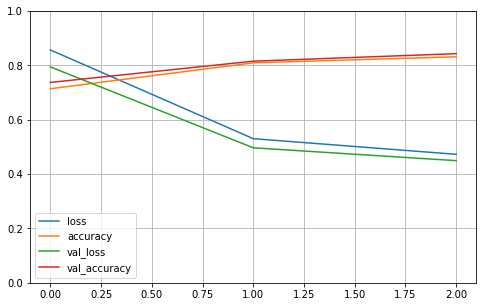

In [ ]:
import pandas as pd

pd.DataFrame(model_history_a.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
ev = model_a.evaluate(X_test_n, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.4924 - accuracy: 0.8215


AxesImage(54,36;334.8x217.44)


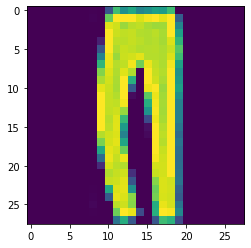

In [ ]:
print(plt.imshow(X_test[2].reshape((28,28))))